# **Information Gain of Twitter ‘Social Spambots’**
## By: Jason Weidner & Joaquin Quintana

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
from zipfile import ZipFile
import seaborn as sns
import pandas as pd
import numpy as np
import os

Information on this dataset can be found on the [Bot Repository](https://botometer.osome.iu.edu/bot-repository/datasets.html) and the dataset is thoroughly described in Cresci's 2017 paper[The paradigm-shift of social spambots](https://dl.acm.org/doi/10.1145/3041021.3055135). Below is a table from the aforementioned paper describing the data, but we only use the accounts section here. 

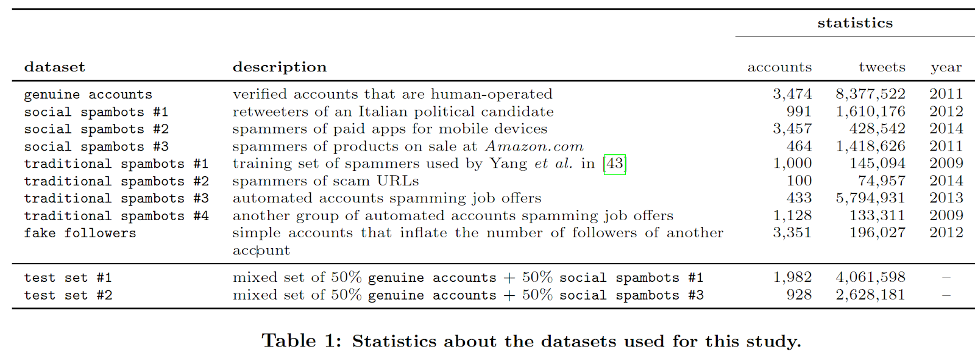

In [2]:
Image(filename = 'Table1 The paradigm-shift of social spambots Cresi 2017.png')

# Part 1: Unzipping the data, directory structure and some exploratory data analysis

## Directory setup for this script
This script assumes the data (Cresci-2017) is in a particular location relative to the notebook. Here's a diagram showing the expected relationship between the data and this notebook.

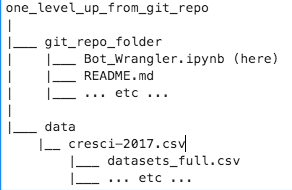

In [3]:
#placed image in folder with this python notebook for user to run and see prior to opening any files
Image(filename = 'Folder Structure Bot_Wrangler.png')

# Find data folder

In [4]:
#Template for function defintions; Note: May consider making the whole directory a file path so all files are found regardless of location. 
def navigator():
    """Changes your current working directory to the one containing unziped data file.
    
    Parameters:
        attr_col (N/A): Navigates from the directory containing the python notebook up one leve to the 
        folder 'data'. This folder contains the zip file with the raw data. Simply run the function after 
        folders are in aforementioned stucture (see schematic above).
    
    Returns: 
        (string): Prints the working directory. The new path is added to the working directory.
        
    Note:
        - This function will change the working directory and keep the notebook on the path to the data
        folder. Allows for the notebook to access the data file remotely. 
    """
    path_parent = os.path.dirname(os.getcwd()) # get directory notebook 
    
    # move up one level and find folder Data 
    f = os.path.join(os.path.expanduser('~'),path_parent,'data')
    
    #add working filepath to working directory, this is will find the data folder and then start unzipping files
    os.chdir(f)
    return(f)

## Unzip the dataset recursively

In [5]:
def unzip_all_zips(Zip_File_Name):
    """ Opens all zipfiles in the working directory and the subsequent sub directories. 
    
    Parameters:
        attr_col (string): input zip folder's name. For example, 'folderName.zip'
    
    Returns: 
        (string): Print "Done!" When finished opening files.
        
    Note:
        - This function will open all folders with ext .zip. 
        Warning! - function will overwrite all data with identical folder names 
    """
    # specifying the zip file name 
    folder = Zip_File_Name 
    
    # opening the zip file in READ mode 
    with ZipFile(folder, 'r') as zip:
        zip.extractall() 

    #navigate into subdirectory
    os.chdir('datasets_full.csv')
    path = os.getcwd()
    
    #get all files in subdirectory 
    all_files = os.listdir('.')
    all_zip_files = [file for file in all_files if file.endswith('.zip')] # find only the zip files
    
    #open all identified zip files in subdriectory
    for file in all_zip_files:
        with ZipFile(file, 'r') as zip: 
            zip.extractall() 
            
    return("Done!")

In [6]:
#find data folder and to path
navigator()

'/Users/JQ/Documents/Data_Mine/Bots_Project/data'

In [7]:
#unzip all files with the zip ext. Add to file Path
unzip_all_zips('cresci-2017.csv.zip')

'Done!'

### Read in some data

In [8]:
#After running bnavigator and unzipping files we can use the following constants to find all csv files on file path
REAL_USERS = os.getcwd() + '/genuine_accounts.csv/users.csv'
REAL_TWEETS = os.getcwd() + '/genuine_accounts.csv/tweets.csv'

SOCIAL_USERS_1 = os.getcwd() + '/social_spambots_1.csv/users.csv'
SOCIAL_USERS_2 = os.getcwd() + '/social_spambots_2.csv/users.csv'
SOCIAL_USERS_3 = os.getcwd() + '/social_spambots_3.csv/users.csv'

TRAD_USERS_1 = os.getcwd() + '/traditional_spambots_1.csv/users.csv'
TRAD_USERS_2 = os.getcwd() + '/traditional_spambots_2.csv/users.csv'
TRAD_USERS_3 = os.getcwd() + '/traditional_spambots_3.csv/users.csv'
TRAD_USERS_4 = os.getcwd() + '/traditional_spambots_4.csv/users.csv'

TRAD_TWEETS_1 = os.getcwd() + '/traditional_spambots_1.csv/tweets.csv'
TRAD_TWEETS_2 = os.getcwd() + '/traditional_spambots_2.csv/tweets.csv'
TRAD_TWEETS_3 = os.getcwd() + '/traditional_spambots_3.csv/tweets.csv'
TRAD_TWEETS_4 = os.getcwd() + '/traditional_spambots_4.csv/tweets.csv'


In [9]:
real_users = pd.read_csv(REAL_USERS)
real_tweets = pd.read_csv(REAL_TWEETS)

tradbot_1 = pd.read_csv(TRAD_USERS_1)
tradbot_2 = pd.read_csv(TRAD_USERS_2)
tradbot_3 = pd.read_csv(TRAD_USERS_3)
tradbot_4 = pd.read_csv(TRAD_USERS_4)

socbots_1 = pd.read_csv(SOCIAL_USERS_1)
socbots_2 = pd.read_csv(SOCIAL_USERS_2)
socbots_3 = pd.read_csv(SOCIAL_USERS_3)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Determine the number of entries per file. Just for files concerning the users not tweets. 

In [10]:
l = [real_users,tradbot_1,tradbot_2,tradbot_3,tradbot_4,socbots_1,socbots_2,socbots_3]
size = []
#get the number of rows in each file
for name in l:
    size.append(name.id.shape[0])
    
#place x labels and convert to Dataframe
labels = ['real_users','tradbot_1','tradbot_2','tradbot_3','tradbot_4','socbots_1','socbots_2','socbots_3']
dat = pd.DataFrame(size,labels)

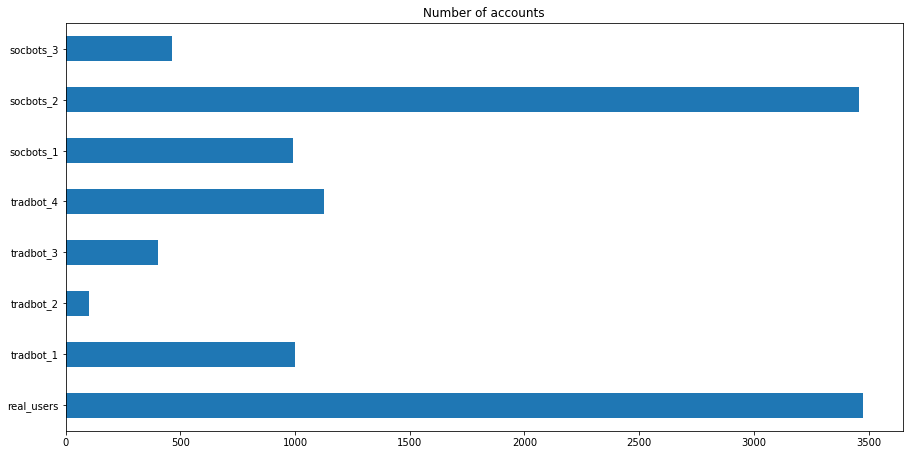

In [11]:
#plot bar chart showing the sizes of each file
dat.plot.barh(legend=False,figsize=(15,7.5));
plt.title('Number of accounts');

## Describe a few of the datasets to see what there is to work with.

In [12]:
real_users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,...,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,test_set_1,test_set_2
count,3.474000e+03,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,1032.0,13.0,2155.0,3084.0,...,2475.000000,1.0,0.0,78.0,11.0,0.0,0.0,0.0,3474.000000,3474.000000
mean,9.519675e+08,16958.220207,1393.219632,633.242372,4669.620322,19.496546,1.0,1.0,1.0,1.0,...,-4386.545455,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.287853,0.141048
std,9.942397e+08,30696.286104,17216.664524,1600.962972,11527.566663,157.740969,0.0,0.0,0.0,0.0,...,22486.293337,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.452827,0.348121
min,6.780330e+05,3.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,-39600.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
25%,1.475541e+08,1810.250000,149.000000,169.000000,261.250000,0.000000,1.0,1.0,1.0,1.0,...,-25200.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
50%,4.751671e+08,6609.000000,341.000000,319.000000,1286.000000,2.000000,1.0,1.0,1.0,1.0,...,-14400.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
75%,1.655303e+09,19467.000000,803.750000,635.750000,4727.000000,8.000000,1.0,1.0,1.0,1.0,...,18000.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,0.000000
max,3.164942e+09,399555.000000,986837.000000,46310.000000,313954.000000,6166.000000,1.0,1.0,1.0,1.0,...,46800.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000


In [13]:
real_tweets.describe()

,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,geo,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions
count,2.839361e+06,0.0,2.839361e+06,2.839361e+06,2.839361e+06,0.0,0.0,2.839361e+06,2839361.0,2.839361e+06,0.0,0.0,17686.0,2.839361e+06,2.839361e+06,2.839361e+06
mean,6.913012e+08,NaN,1.357797e+17,2.049461e+08,1.361281e+17,NaN,NaN,8.411514e+02,0.0,4.657104e-01,NaN,NaN,1.0,2.476931e-01,1.507469e-01,7.714422e-01
std,8.170510e+08,NaN,2.327207e+17,5.709004e+08,2.342648e+17,NaN,NaN,1.669803e+04,0.0,5.891934e+00,NaN,NaN,0.0,7.314669e-01,3.659809e-01,8.773255e-01
min,6.780330e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.697050e+07,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.364496e+08,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,1.000000e+00
75%,6.133457e+08,NaN,3.086028e+17,2.476506e+07,3.054094e+17,NaN,NaN,1.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,1.000000e+00
max,2.356426e+09,NaN,5.941393e+17,3.224944e+09,5.941401e+17,NaN,NaN,3.350111e+06,0.0,4.278000e+03,NaN,NaN,1.0,2.800000e+01,5.000000e+00,1.900000e+01


In [14]:
tradbot_1.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,default_profile,default_profile_image,...,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.581095e+07,220.829000,637.297000,1326.542000,4.328000,7.900000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.242864e+07,1402.942102,2096.491834,1824.098999,101.931106,96.959596,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.248952e+06,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.141044e+07,2.000000,96.000000,593.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.215063e+07,16.000000,198.500000,956.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.803460e+07,69.000000,637.250000,1833.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.209203e+08,34402.000000,40368.000000,34504.000000,3200.000000,2858.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
socbots_1.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,test_set_1
count,9.910000e+02,991.000000,991.000000,991.000000,991.000000,991.000000,145.0,1.0,18.0,988.0,266.0,903.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,991.0
mean,6.490490e+08,1111.998991,1784.907164,1853.768920,158.171544,3.954591,1.0,1.0,1.0,1.0,1.0,10453.156146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,4.812682e+08,5740.506607,3217.001658,3111.163974,2160.885086,23.658149,0.0,NaN,0.0,0.0,0.0,2139.608649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,2.485829e+07,5.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-25200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,4.662803e+08,83.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,4.671212e+08,138.000000,234.000000,313.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,5.422122e+08,414.500000,3841.500000,4087.500000,0.000000,4.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
max,2.525273e+09,106283.000000,48787.000000,45690.000000,50699.000000,656.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Part 2: Define functions for information gain calculations

$$ Information Gain (Y,X) = Entropy(Y) - Entropy(Y|X) $$


In [16]:
def Info_Gain_Dataset(bot_flag_col, df):
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (String): The name of the column we want to use for calculating information gain
        bot_flag_col (String): The name of the column for bot_status (i.e. authentic user or bot)
        df (DataFrame): Df containing all the data
        
    
    Returns: 
        (np.float64): The information gain of attr_col in df.
        
    Note:
        - This function will call Info_gain_dataset in order to calculate info_gain_attribute.
    """
    # number of different attributes
    uniques = df[bot_flag_col].unique()
    
    m = len(uniques)

    n = df.shape[0]
    # See https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe

    #print("m:", m, "n:", n)

    #print(df[bot_flag_col].value_counts())

    # calculate probabilities for each class
    p_i = []
    for attr_count in df[bot_flag_col].value_counts().values.tolist():
        p_temp = attr_count / np.sum(df[bot_flag_col].value_counts().values)
        p_i.append(p_temp)
    #print("p_i:", p_i)

    # calculte individual entropies and sum
    I_D = 0
    for i in range(0,m):
        I_D += -p_i[i] * np.log2(p_i[i])
    #I_D
        
    return I_D

In [17]:
def Info_Gain_Attribute(attr_col, bot_flag_col, df):
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (String): The name of the column we want to use for calculating information gain
        bot_flag_col (String): The name of the column for bot_status (i.e. authentic user or bot)
        df (DataFrame): Df containing all the data
        
    
    Returns: 
        (np.float64): The information gain of attr_col in df.
        
    Note:
        - This function will call Info_gain_dataset in order to calculate info_gain_attribute.
    """
    
    m = df[attr_col].values.tolist()
    m = list(set(m))
    #print("m:", m)
    num_in_set = np.sum(df[bot_flag_col].value_counts().values)
    result = []
    result_sum = 0

    for m in list(set(df[attr_col].values.tolist())):
        p = len(df[(df[bot_flag_col] == 1) & (df[attr_col] == m)].values.tolist())
        n = len(df[(df[bot_flag_col] == 0) & (df[attr_col] == m)].values.tolist())
        #print(p,n)
        result.append(I(p,n,num_in_set))
        result_sum += I(p,n,num_in_set)
    # print(result)
    return result_sum

In [18]:
def I(p,n,num_in_set):
    tot = p + n
    if(p == 0):
        first_term = 0
    else:
        first_term = (p/tot) * np.log2(p/tot)
    
    if(n == 0):
        second_term = 0
    else:
        second_term = (n/tot) * np.log2(n/tot)
    
    # this is the mistake: -(first_term + second_term)
    
    # it should be (tot/total in dataset)*(-first_term - second_term)
    
    #print('first term',-first_term)
    #print('second term',- second_term)
    #print('combined terms',(-first_term - second_term))
    #print((tot/num_in_set)*(-first_term - second_term))
    
    return ((tot/num_in_set)*(-first_term - second_term))

# Part 3: Calculating total information for traditional spambot dataset

In [19]:
data = real_users
data = data.assign(bot=0) # create column of zeros named 'bot'
real_users_only = data[['id', 'bot']] # create a dataframe that is only the columns 'id' and 'bot'
real_users_only # show data

,id,bot
0,1502026416,0
1,2492782375,0
2,293212315,0
3,191839658,0
4,3020965143,0
...,...,...
3469,205218909,0
3470,2874966164,0
3471,2980901837,0
3472,121122678,0


In [20]:
data = tradbot_1
data = data.assign(bot=1) # create column of ones named 'bot'
trad_Bot_users_only = data[['id', 'bot']] #create df with columns 'id' and 'bot'
trad_Bot_users_only # show data

,id,bot
0,7248952,1
1,7732472,1
2,9524952,1
3,10788822,1
4,14596967,1
...,...,...
995,117166638,1
996,117281140,1
997,117318786,1
998,117320084,1


In [21]:
real_users_and_trad_bot = pd.concat([trad_Bot_users_only, real_users_only], axis=0) # concat df's, one on top of the other
real_users_and_trad_bot.set_index(keys="id")

,bot
id,
7248952,1
7732472,1
9524952,1
10788822,1
14596967,1
...,...
205218909,0
2874966164,0
2980901837,0


In [22]:
ID_tradbots = Info_Gain_Dataset("bot", real_users_and_trad_bot) # returns the information for the entire dataset
print("Total information for the traditional bots dataset is:", ID_tradbots)

Total information for the traditional bots dataset is: 0.7665315957882222


# Part 4: Traditional Spambot Analysis
## Determine a rule - and calculate the information gain for that rule
### Rule: user has >30 followers
Note: We are calculating the information gain if we were to split the dataset into users with >30 or <=30 followers.

In [23]:
def create_col_gt_30_followers(df):
    """Creates a df with two columns: "id" and 'followers_gt_30', which is 1 or 0 based on if the user have over 30 followers.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "followers_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and "followers_gt_30" with appropriate numerical boolean value.
    """
    data = df.assign(followers_gt_30=0) # create column of zeros named 'followers_gt_30'
    
    #assign 1's to column followers_gt_30 when followers_count > 30
    data.loc[data.followers_count > 30, 'followers_gt_30'] = 1
    
    #return new column with 0 and 1s given condition and the associated id.  
    data = data[['id', 'followers_gt_30']] 
    
    return data

In [24]:
data_real = real_users_and_trad_bot
data_real

,id,bot
0,7248952,1
1,7732472,1
2,9524952,1
3,10788822,1
4,14596967,1
...,...,...
3469,205218909,0
3470,2874966164,0
3471,2980901837,0
3472,121122678,0


In [25]:
gt_30_followers_bots = create_col_gt_30_followers(tradbot_1)
gt_30_followers_real = create_col_gt_30_followers(real_users)

gt_30_f_data = pd.concat([gt_30_followers_bots,gt_30_followers_real], axis=0)
gt_30_f_total = pd.merge(gt_30_f_data, data_real, left_on='id', right_on='id')
gt_30_f_total

,id,followers_gt_30,bot
0,7248952,1,1
1,7732472,1,1
2,9524952,1,1
3,10788822,1,1
4,14596967,1,1
...,...,...,...
4469,205218909,1,0
4470,2874966164,1,0
4471,2980901837,0,0
4472,121122678,1,0


In [26]:
I_A_gt_30_followers = Info_Gain_Attribute("followers_gt_30", "bot", gt_30_f_total)
I_A_gt_30_followers

0.7622379198746638

In [27]:
#I_gain_30_followers = I_A_gt_30_followers - ID_tradbots
I_gain_30_followers = ID_tradbots - I_A_gt_30_followers
I_gain_30_followers

0.004293675913558337

In [28]:
def create_col_gt_100_followers(df):
    """Creates a df with two columns: "id" and 'followers_gt_100', which is 1 or 0 based on if the user have over 100 followers.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "followers_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and "followers_gt_100" with appropriate numerical boolean value.
    """
    data = df.assign(followers_gt_100 = 0) # create column of zeros named 'followers_gt_100'
    data.loc[data.followers_count > 100, 'followers_gt_100'] = 1
    data = data[['id', 'followers_gt_100']]
    
    return data

In [29]:
def create_col_user_authored_over_1000_tweets(df):
    """Creates a df with two columns: "id" and boolean indicating if user authored over 1000 tweets.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "tweets"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and a boolean value for if user has authored > 1000 tweets.
    """
        
    data = df.assign(authored_gt_1000_tweets = 0) # create column of zeros named 
    data.loc[data.statuses_count > 1000, 'authored_gt_1000_tweets'] = 1
    data = data[['id', 'authored_gt_1000_tweets']]

    return data

In [30]:
def create_col_user_authored_over_50_tweets(df):
    """Creates a df with two columns: "id" and boolean indicating if user authored over 50 tweets.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "statuses_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and a boolean value for if user has authored > 50 
        tweets (includes retweeets).
    """
    # statuses_count: The number of Tweets (including retweets) issued by the user.
    # new column for storage authored_gt_50_tweets
    
    data = df.assign(authored_gt_50_tweets = 0) # create column of zeros named 
    data.loc[data.statuses_count > 50, 'authored_gt_50_tweets'] = 1
    data = data[['id', 'authored_gt_50_tweets']]

    return data

In [31]:
#friends_count: The number of users this account is following (AKA their “followings”). Under certain conditions of duress, 
# this field will temporarily indicate “0”.
def create_col_user_follows_gt_30(df):
    """Creates a df with two columns: "id" and boolean indicating if user follows over 30 other accounts.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "friends_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and a boolean value for if following count > 30.
    """
    data = df.assign(follows_gt_30 = 0) # create column of zeros named 'followers_gt_30'
    data.loc[data.friends_count > 30, 'follows_gt_30'] = 1
    data = data[['id', 'follows_gt_30']]
    
    return data

In [32]:
def create_col_user_follows_gt_100(df):
    """Creates a df with two columns: "id" and boolean indicating if user follows over 100 other accounts.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "friends_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if following count > 100.
    """
    data = df.assign(follows_gt_100 = 0) # create column of zeros named 'followers_gt_100'
    data.loc[data.friends_count > 100, 'follows_gt_100'] = 1
    data = data[['id', 'follows_gt_100']]

    return data

In [33]:
def create_col_user_authored_over_50_tweets(df):
    """Creates a df with two columns: "id" and boolean indicating if user authored over 50 tweets.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "statuses_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and a boolean value for if user has authored > 50 
        tweets (includes retweeets).
    """
    # statuses_count: The number of Tweets (including retweets) issued by the user.
    # new column for storage authored_gt_50_tweets
    
    data = df.assign(authored_gt_50_tweets = 0) # create column of zeros named 
    data.loc[data.statuses_count > 50, 'authored_gt_50_tweets'] = 1
    data = data[['id', 'authored_gt_50_tweets']]

    return data

# Question: Is there a value of friends/followers^2 that can be used to effectively differentiate between traditional spambots and authentic users?

In [34]:
# friends_count: The number of users this account is following (AKA their “followings” or "friends").
# followers_count: how many users follow this user (AKA followers).
def frame_friends_square_followers_ratio(df):
    """Creates a df with two columns: "id" and the computed ratios for (friends) / (followers^2) as a float.
    
    Parameters:
        df (pd.df): a dataframe with at least three columns: "id" and "friends_count", "followers_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and ratios for (friends) / (followers^2) as a float.
    """
    #columns you want to pull from csv file 
    list_of_columns = ['id','friends_count','followers_count']

    #return pandas dataframe with select columns. 
    df_select_col = df[list_of_columns]
    
    #compute friends/followers^2 ratio
    friends_followers_ratio = df_select_col.friends_count/df_select_col.followers_count**2
    
    #drop columns which are no longer needed
    df_select_col = df_select_col.drop(['friends_count', 'followers_count'], axis=1)
    
    #create new column to place ratio
    df_select_col['friends/followers^2'] = friends_followers_ratio
    
    #return the data frame with "id" and "friends/followers^2"
    return df_select_col

In [35]:
#compute friends to follower ratio for real users and traditional bots.
real_ratio = frame_friends_square_followers_ratio(real_users)
bot_ratio = frame_friends_square_followers_ratio(tradbot_1)

In [36]:
# concatenate real users and traditional bots after computing compute friends to follower ratio
ratio_data = pd.concat([real_ratio,bot_ratio], axis=0) 
ratio_data

,id,friends/followers^2
0,1502026416,0.007674
1,2492782375,0.004454
2,293212315,0.006423
3,191839658,0.000194
4,3020965143,0.179138
...,...,...
995,117166638,0.046009
996,117281140,0.001980
997,117318786,0.000216
998,117320084,0.000312


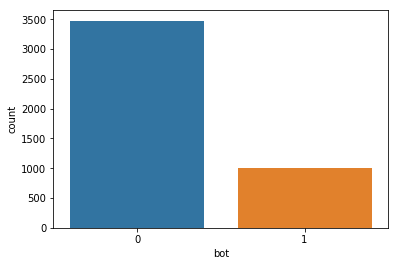

In [37]:
# there are more non-bots than bots in the dataset.
ratio_total = pd.merge(ratio_data, data_real, left_on='id', right_on='id') #merge files and use id for identifcation. 
sns.countplot(x="bot", data=ratio_total);

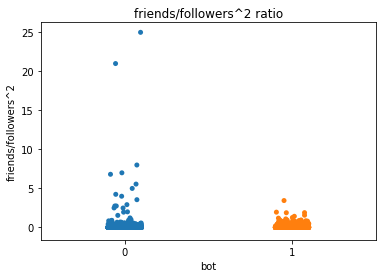

In [38]:
ax = sns.stripplot(x="bot", y="friends/followers^2", data=ratio_total)
plt.title('friends/followers^2 ratio');

It is hard to see from this plot if there is a threshold value of the ratio that would easily differentiate between the two populations.

In [39]:
ratio_total

,id,friends/followers^2,bot
0,1502026416,0.007674,0
1,2492782375,0.004454,0
2,293212315,0.006423,0
3,191839658,0.000194,0
4,3020965143,0.179138,0
...,...,...,...
4469,117166638,0.046009,1
4470,117281140,0.001980,1
4471,117318786,0.000216,1
4472,117320084,0.000312,1


In [40]:
ratio_total[ratio_total["bot"] == 1].describe()

,id,friends/followers^2,bot
count,1.000000e+03,999.000000,1000.0
mean,7.581095e+07,0.090005,1.0
std,2.242864e+07,0.227091,0.0
min,7.248952e+06,0.000018,1.0
25%,6.141044e+07,0.004041,1.0
50%,7.215063e+07,0.018523,1.0
75%,9.803460e+07,0.065469,1.0
max,1.209203e+08,3.446281,1.0


In [41]:
ratio_total[ratio_total["bot"] == 0].describe()

,id,friends/followers^2,bot
count,3.474000e+03,3474.000000,3474.0
mean,9.519675e+08,0.053141,0.0
std,9.942397e+08,0.631690,0.0
min,6.780330e+05,0.000000,0.0
25%,1.475541e+08,0.000866,0.0
50%,4.751671e+08,0.002770,0.0
75%,1.655303e+09,0.009969,0.0
max,3.164942e+09,25.000000,0.0


From the two cells above we can see that the distribution of the ratio is different between bot and non-bot populations (look at the inner-quartile range). To show the difference more clearly, let's show a plot of the effective cumulative distributions for the two sub-sets of data. The vertical redline shows the threshold we decided to use moving forward.  

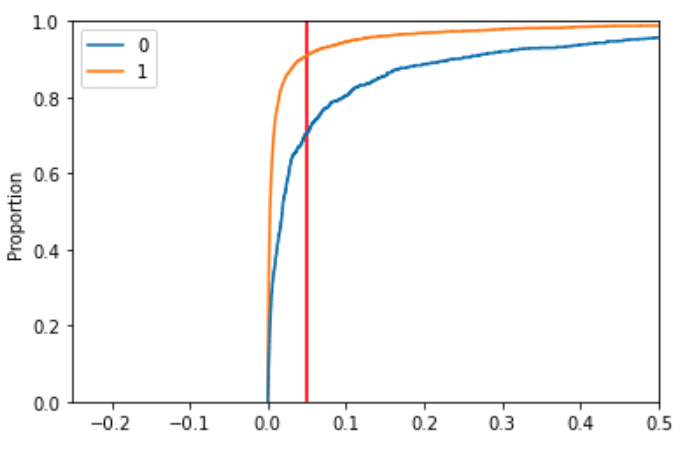

In [44]:
Image(filename = 'Friends_Followers_Threshold.png')

### Rule: friends/followers^2 < 0.05

Here we can see that a ratio ~0.05 maximizes the difference between the two cumulative distributions, meaning such a threshold would help separate the two populations. We can use the threshold to flag users as having a ratio above or below the threshold, and then calculate information gain on the flag.

In [46]:
def ff2_ratio_flag(df):
    """Creates a df with two columns: "id" and a flag for (friends) / (followers^2) above or below 0.05.
    
    Parameters:
        df (pd.df): a dataframe with at least three columns: "id" and "friends_count", "followers_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and ratios for (friends) / (followers^2) as a float.
    """
    #columns you want to pull from csv file 
    list_of_columns = ['id','friends_count','followers_count']

    #return pandas dataframe with select columns. 
    df_select_col = df[list_of_columns]
    
    #compute friends/followers^2 ratio
    friends_followers_ratio = df_select_col.friends_count/df_select_col.followers_count**2 > 0.05
    
    #drop columns which are no longer needed
    df_select_col = df_select_col.drop(['friends_count', 'followers_count'], axis=1)
    
    #create new column to place ratio
    df_select_col['friends/followers^2'] = friends_followers_ratio
    
    #return the data frame with "id" and "friends/followers^2"
    return df_select_col

In [47]:
real_ff2_flag = ff2_ratio_flag(real_users)
bot_ff2_flag = ff2_ratio_flag(tradbot_1)

In [48]:
ff2_data = pd.concat([real_ff2_flag,bot_ff2_flag], axis=0) 
ff2_data

,id,friends/followers^2
0,1502026416,False
1,2492782375,False
2,293212315,False
3,191839658,False
4,3020965143,True
...,...,...
995,117166638,False
996,117281140,False
997,117318786,False
998,117320084,False


In [49]:
ff2_total = pd.merge(ff2_data, data_real, left_on='id', right_on='id') #merge files and use id for identifcation. 
ff2_total

,id,friends/followers^2,bot
0,1502026416,False,0
1,2492782375,False,0
2,293212315,False,0
3,191839658,False,0
4,3020965143,True,0
...,...,...,...
4469,117166638,False,1
4470,117281140,False,1
4471,117318786,False,1
4472,117320084,False,1


In [50]:
I_A_ff2_05 = Info_Gain_Attribute("friends/followers^2", "bot", ff2_total)
I_A_ff2_05

0.7271356293132045

In [51]:
I_gain_ff2_05 = ID_tradbots - I_A_ff2_05  
I_gain_ff2_05

0.03939596647501764

# Part 5: Compute all results for data. 
All the functions in this notebook follow the same overall pattern as seen in part 3 and 4. Therefore the other functions can easily be computed for the rest of the data using the main function below. 
Here I will do everything above in two functions. The main will return a pandas DataFrame and all the information gains when passed two dataframes containing real users and the other containing bot users. 

**Note:**
$$ Information Gain (Y,X) = Entropy(Y) - Entropy(Y|X) $$

In [52]:
def create_col_target_column_IG(df_real_users,df_bot,function_to_compute_attribute):
    """Creates a df with two columns: "id" and target column this is, if a bot return 1 and if not a bot account return 0. 
    
    Parameters:
        df (pd.df): takes three inputs. Two dataframes with at least two columns; one that is real users and the other a bot users
                    and function_to_compute_attribute, this is the name of the function. 
        
    Returns:
        df (pd.df): a dataframe with three columns: "id", "Bot" and a new column which contains the computed attribute. 
        
    Note: 
    """
    
    data = df_real_users
    real_users_only = data.assign(bot=0) # create column of zeros named 'bot'

    data_bot = df_bot
    bot_only = data_bot.assign(bot=1) # create column of ones named 'bot'
    
    # concat df's, one on top of the other
    real_users_and_bot = pd.concat([bot_only,real_users_only], axis=0) 
    
    #merge dataframes based off index, this is, ensure the rows align correctly.
    #here the attibute boolean is caluclated for the function passed in. 
    out = pd.merge(function_to_compute_attribute(real_users_and_bot), real_users_and_bot, left_on='id', right_on='id')
    keep = out.columns[1]
    
    #drop useless columns. Keep on the id, new column containing the attribute and the target AKA "bot"
    out = out[['id',str(keep),'bot']]
    
    return out

In [53]:
#compute attribute and merge to target data
def compute_all_gains_needed(df_complete):
    """Creates a df with three columns: 'Entropy(Dataset)','Entropy(Attribute)','Information_Gain'. 
    
    Parameters:
        df (pd.df): takes dataframe created using function "create_col_target_column_IG". 
        
    Returns:
        df (pd.df): a dataframe with three columns: 'Entropy(Dataset)','Entropy(Attribute)','Information_Gain'. 
        
    Note: 
    """
    #Compute entropy for entire dataset
    Info_Gain_Datset = Info_Gain_Dataset("bot", df_complete)
    
    #Compute entropy for attribute
    attribute_columns =  df_complete.columns[1]
    string_attribute_col = str(attribute_columns)
    
    Info_Gain_Attr = Info_Gain_Attribute(string_attribute_col, "bot", df_complete)
   
    #Differences between entropy for dataset and attribute 
    actaul_info_gain_for_attribute = Info_Gain_Datset - Info_Gain_Attr
    
    #Place results in DataFrame and return
    results = pd.DataFrame([Info_Gain_Datset,Info_Gain_Attr, actaul_info_gain_for_attribute]).T
    results.columns = ['Entropy(Dataset)','Entropy(Attribute)','Information_Gain']
    
    return results

In [54]:
def main(df_real_users,df_bots):
    """Creates a df with three columns: 'Entropy(Dataset)','Entropy(Attribute)','Information_Gain' for all functions which compute 
    information gain for a provided attribute. 

      
    Parameters:
        df (pd.df): takes two dataframes: 1. the "df_real_users" and a 2. "df_bots". 
        
    Returns:
        df (pd.df): a dataframe with three columns: 'Entropy(Dataset)','Entropy(Attribute)','Information_Gain'. 
        
    Note: 
    """
    
    #list for storing results computed in for loop.
    results = []
    #all the function defined for computing unique attributes to be used for entorpy computations. 
    func_list = [create_col_user_follows_gt_30,create_col_user_follows_gt_100,create_col_gt_30_followers,
                 create_col_gt_100_followers,ff2_ratio_flag,create_col_user_authored_over_50_tweets,
                 create_col_user_authored_over_1000_tweets]

    #for loop to iterate overall all funcitons 
    for fx in func_list:
        
        #Create target and attribute 
        full_data = create_col_target_column_IG(df_real_users,df_bots,fx) 
        
        #compute the gain for each function
        gain = compute_all_gains_needed(full_data)
        #append info gain results
        results.append(gain)
    
    #convert list of dataframes to a single df and return the results
    df = pd.concat(results)
    df = df.reset_index(drop=True)
    
    #place labels for attibute computed
    l = ['Following >30','Following > 100', 'Followers >30','Followers > 100','Friends/follower^2 > 0.05',
                           'Authored > 50 tweets','Authored > 1000 tweets']

    df = df.set_index([pd.Index(l)])
    
    #add attribute name for the index column, which is just the name
    df.index.name = 'Attribute'
    
    return df

In [55]:
Tradiondal_bots_1 = main(real_users,tradbot_1)
print("Results Tranditional Bots 1: \n")
Tradiondal_bots_1

Results Tranditional Bots 1: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.766532,0.761789,0.004743
Following > 100,0.766532,0.739135,0.027397
Followers >30,0.766532,0.762238,0.004294
Followers > 100,0.766532,0.760156,0.006375
Friends/follower^2 > 0.05,0.766532,0.727136,0.039396
Authored > 50 tweets,0.766532,0.394223,0.372309
Authored > 1000 tweets,0.766532,0.397908,0.368623


In [56]:
Social_bots = main(real_users,socbots_1)
print("Results Social Bots 1: \n")
Social_bots

Results Social Bots 1: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.763709,0.606343,0.157366
Following > 100,0.763709,0.691918,0.071791
Followers >30,0.763709,0.639209,0.124501
Followers > 100,0.763709,0.710595,0.053115
Friends/follower^2 > 0.05,0.763709,0.762374,0.001335
Authored > 50 tweets,0.763709,0.729083,0.034627
Authored > 1000 tweets,0.763709,0.504447,0.259262


In [57]:
Tradiondal_bots_2 = main(real_users,tradbot_2)
print("Results Tranditional Bots 2: \n")
Tradiondal_bots_2

Results Tranditional Bots 2: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.184157,0.183389,0.000769
Following > 100,0.184157,0.120847,0.063311
Followers >30,0.184157,0.173119,0.011038
Followers > 100,0.184157,0.118838,0.065319
Friends/follower^2 > 0.05,0.184157,0.179818,0.004340
Authored > 50 tweets,0.184157,0.183534,0.000623
Authored > 1000 tweets,0.184157,0.119144,0.065014


In [58]:
Tradiondal_bots_3 = main(real_users,tradbot_3)
print("Results Tranditional Bots 3: \n")
Tradiondal_bots_3

Results Tranditional Bots 3: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.481382,0.419926,0.061456
Following > 100,0.481382,0.373986,0.107395
Followers >30,0.481382,0.428074,0.053308
Followers > 100,0.481382,0.353655,0.127727
Friends/follower^2 > 0.05,0.481382,0.432697,0.048685
Authored > 50 tweets,0.481382,0.417755,0.063627
Authored > 1000 tweets,0.481382,0.471289,0.010093


In [59]:
Tradiondal_bots_4 = main(real_users,tradbot_4)
print("Results Tranditional Bots 3: \n")
Tradiondal_bots_4

Results Tranditional Bots 3: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.803437,0.798817,0.004620
Following > 100,0.803437,0.772193,0.031244
Followers >30,0.803437,0.786831,0.016606
Followers > 100,0.803437,0.759655,0.043781
Friends/follower^2 > 0.05,0.803437,0.774989,0.028448
Authored > 50 tweets,0.803437,0.501687,0.301750
Authored > 1000 tweets,0.803437,0.373253,0.430184


In [60]:
Social_bots_1 = main(real_users,socbots_1)
print("Results Social Bots 1: \n")
Social_bots_1

Results Social Bots 1: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.763709,0.606343,0.157366
Following > 100,0.763709,0.691918,0.071791
Followers >30,0.763709,0.639209,0.124501
Followers > 100,0.763709,0.710595,0.053115
Friends/follower^2 > 0.05,0.763709,0.762374,0.001335
Authored > 50 tweets,0.763709,0.729083,0.034627
Authored > 1000 tweets,0.763709,0.504447,0.259262


In [61]:
Social_bots_2 = main(real_users,socbots_2)
print("Results Social Bots 2: \n")
Social_bots_2

Results Social Bots 2: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.999996,0.999798,0.000198
Following > 100,0.999996,0.355726,0.644269
Followers >30,0.999996,0.226421,0.773575
Followers > 100,0.999996,0.383732,0.616263
Friends/follower^2 > 0.05,0.999996,0.271409,0.728587
Authored > 50 tweets,0.999996,0.801605,0.198390
Authored > 1000 tweets,0.999996,0.374598,0.625397


In [62]:
Social_bots_3 = main(real_users,socbots_3)
print("Results Social Bots 3: \n")
Social_bots_3

Results Social Bots 3: 



,Entropy(Dataset),Entropy(Attribute),Information_Gain
Attribute,,,
Following >30,0.52308,0.522370,0.000710
Following > 100,0.52308,0.513730,0.009350
Followers >30,0.52308,0.521148,0.001932
Followers > 100,0.52308,0.509618,0.013462
Friends/follower^2 > 0.05,0.52308,0.518724,0.004357
Authored > 50 tweets,0.52308,0.521634,0.001446
Authored > 1000 tweets,0.52308,0.512914,0.010166


# Results

### Please see [full report](https://docs.google.com/document/d/1HI4KQSA88TvTo6F27xG43Y0w9LOFMF1MKqPE4LJ7nz8/edit) for a thourough overview of the results computed here. There is a hard copy of this report also avilable on the [github account](https://github.com/jasonweidner/CSPB_4502/blob/main/Group2_Information%20Gain%20of%20Twitter%20%E2%80%98Social%20Spambots%E2%80%99_Part6.pdf). 